In [2]:
# adding dependencies
import os
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
from config import omdb_key

In [3]:
# importing CSV and creating a DataFrame
path = "C:\\Users\\Derek\\Desktop\\"
file = os.path.join(path, "The-First-Project", "netflix_daily_top_10.csv")
netflix_df = pd.read_csv(file)
netflix_df.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [4]:
# changing the NaN value to 'No' in the column titled 'Netflix Exclusive'
netflix_df["Netflix Exclusive"] = netflix_df["Netflix Exclusive"].fillna("No")
netflix_df

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,No,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,No,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,No,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,No,"Mar 1, 2022",10,33


In [156]:
# filtering the data to only pull the information for the 2nd quarter of 2020
q2_2020 = netflix_df.loc[(netflix_df["As of"] >= "2020-04-01") & (netflix_df["As of"] <= "2020-06-30")]

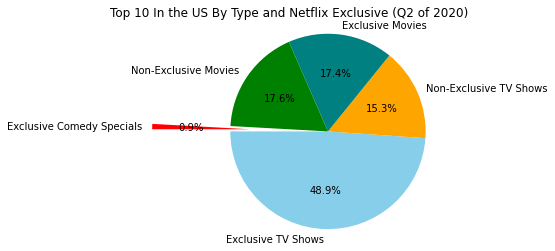

In [157]:
# creating variables to hold the numerical values that will be incorporated into the pie chart
q220_exclusive_tv = q2_2020.loc[(q2_2020["Netflix Exclusive"] == "Yes") & (q2_2020["Type"] == "TV Show")]["Netflix Exclusive"].count()
q220_non_exclusive_tv = q2_2020.loc[(q2_2020["Netflix Exclusive"] == "No") & (q2_2020["Type"] == "TV Show")]["Netflix Exclusive"].count()
q220_exclusive_movie = q2_2020.loc[(q2_2020["Netflix Exclusive"] == "Yes") & (q2_2020["Type"] == "Movie")]["Netflix Exclusive"].count()
q220_non_exclusive_movie = q2_2020.loc[(q2_2020["Netflix Exclusive"] == "No") & (q2_2020["Type"] == "Movie")]["Netflix Exclusive"].count()
q220_exclusive_comedy = q2_2020.loc[(q2_2020["Netflix Exclusive"] == "Yes") & (q2_2020["Type"] == "Stand-Up Comedy")]["Netflix Exclusive"].count()

# creating variables to hold the information that will be used to create the pie chart
q220_exclusive_list = [q220_exclusive_tv, q220_non_exclusive_tv, q220_exclusive_movie, q220_non_exclusive_movie, 
                  q220_exclusive_comedy]
q220_exclusive_names = ["Exclusive TV Shows", "Non-Exclusive TV Shows", "Exclusive Movies",
                        "Non-Exclusive Movies", "Exclusive Comedy Specials"]
colors = ["skyblue", "orange", "teal", "green", "red"]
explode = (0, 0, 0, 0, 0.8)

# creating the pie chart using the variables previously created. Also, printing the image to the folder to use in powerpoint
plt.pie(q220_exclusive_list, explode=explode, labels=q220_exclusive_names, colors=colors, autopct="%1.1f%%", startangle=180)
plt.title("Top 10 In the US By Type and Netflix Exclusive (Q2 of 2020)")
plt.axis("equal")
plt.savefig("C:\\Users\\Derek\\Desktop\\The-First-Project\\q22020-pie.png", bbox_inches='tight')

In [158]:
# filtering the data to only pull the information for the 4th quarter of 2020
q4_2020 = netflix_df.loc[(netflix_df["As of"] >= "2020-10-01") & (netflix_df["As of"] <= "2020-12-31")]

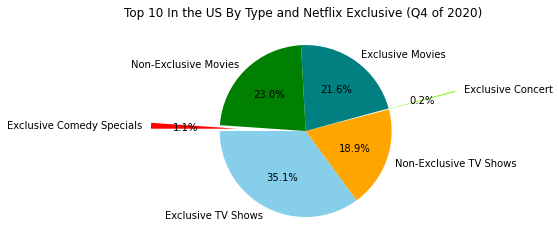

In [159]:
# creating variables to hold the numerical values that will be incorporated into the pie chart
q420_exclusive_tv = q4_2020.loc[(q4_2020["Netflix Exclusive"] == "Yes") & (q4_2020["Type"] == "TV Show")]["Netflix Exclusive"].count()
q420_non_exclusive_tv = q4_2020.loc[(q4_2020["Netflix Exclusive"] == "No") & (q4_2020["Type"] == "TV Show")]["Netflix Exclusive"].count()
q420_exclusive_movie = q4_2020.loc[(q4_2020["Netflix Exclusive"] == "Yes") & (q4_2020["Type"] == "Movie")]["Netflix Exclusive"].count()
q420_non_exclusive_movie = q4_2020.loc[(q4_2020["Netflix Exclusive"] == "No") & (q4_2020["Type"] == "Movie")]["Netflix Exclusive"].count()
q420_exclusive_comedy = q4_2020.loc[(q4_2020["Netflix Exclusive"] == "Yes") & (q4_2020["Type"] == "Stand-Up Comedy")]["Netflix Exclusive"].count()
q420_exclusive_concert = q4_2020.loc[(q4_2020["Netflix Exclusive"] == "Yes") & (q4_2020["Type"] == "Concert/Perf…")]["Netflix Exclusive"].count()

# creating variables to hold the information that will be used to create the pie chart
q420_exclusive_list = [q420_exclusive_tv, q420_non_exclusive_tv, q420_exclusive_concert, q420_exclusive_movie, q420_non_exclusive_movie, 
                       q420_exclusive_comedy]
q420_exclusive_names= ["Exclusive TV Shows", "Non-Exclusive TV Shows", "Exclusive Concert",
                       "Exclusive Movies", "Non-Exclusive Movies", "Exclusive Comedy Specials"]
q420_colors = ["skyblue", "orange", "lawngreen", "teal", "green", "red"]
explode = (0, 0, 0.8, 0, 0, 0.8)

# creating the pie chart using the variables previously created. Also, printing the image to the folder to use in powerpoint
plt.pie(q420_exclusive_list, explode=explode, labels=q420_exclusive_names, colors=q420_colors, autopct="%1.1f%%", startangle=180)
plt.title("Top 10 In the US By Type and Netflix Exclusive (Q4 of 2020)")
plt.axis("equal")
plt.savefig("C:\\Users\\Derek\\Desktop\\The-First-Project\\q42020-pie.png", bbox_inches='tight')

In [160]:
# filtering the data to only pull the information for the 2nd quarter of 2021
q2_2021 = netflix_df.loc[(netflix_df["As of"] >= "2021-04-01") & (netflix_df["As of"] <= "2021-06-30")]

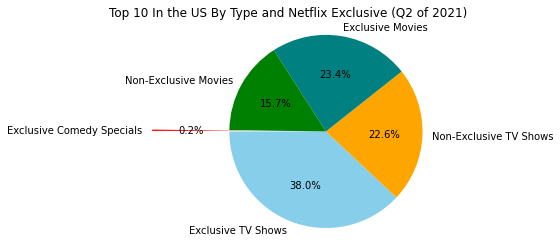

In [161]:
# creating variables to hold the numerical values that will be incorporated into the pie chart
q221_exclusive_tv = q2_2021.loc[(q2_2021["Netflix Exclusive"] == "Yes") & (q2_2021["Type"] == "TV Show")]["Netflix Exclusive"].count()
q221_non_exclusive_tv = q2_2021.loc[(q2_2021["Netflix Exclusive"] == "No") & (q2_2021["Type"] == "TV Show")]["Netflix Exclusive"].count()
q221_exlusive_movie = q2_2021.loc[(q2_2021["Netflix Exclusive"] == "Yes") & (q2_2021["Type"] == "Movie")]["Netflix Exclusive"].count()
q221_non_exclusive_movie = q2_2021.loc[(q2_2021["Netflix Exclusive"] == "No") & (q2_2021["Type"] == "Movie")]["Netflix Exclusive"].count()
q221_exlusive_comedy = q2_2021.loc[(q2_2021["Netflix Exclusive"] == "Yes") & (q2_2021["Type"] == "Stand-Up Comedy")]["Netflix Exclusive"].count()

# creating variables to hold the information that will be used to create the pie chart
q221_exclusive_list = [q221_exclusive_tv, q221_non_exclusive_tv, q221_exlusive_movie, q221_non_exclusive_movie, 
                       q221_exlusive_comedy]
q221_exclusive_names= ["Exclusive TV Shows", "Non-Exclusive TV Shows", "Exclusive Movies",
                       "Non-Exclusive Movies", "Exclusive Comedy Specials"]
colors_21 = ["skyblue", "orange", "teal", "green", "red"]
explode = (0, 0, 0, 0, 0.8)

# creating the pie chart using the variables previously created. Also, printing the image to the folder to use in powerpoint
plt.pie(q221_exclusive_list, explode=explode, labels=q221_exclusive_names, colors=colors, autopct="%1.1f%%", startangle=180)
plt.title("Top 10 In the US By Type and Netflix Exclusive (Q2 of 2021)")
plt.axis("equal")
plt.savefig("C:\\Users\\Derek\\Desktop\\The-First-Project\\q22021-pie.png", bbox_inches='tight')

In [162]:
# filtering the data to only pull the information for the 4th quarter of 2021
q4_2021 = netflix_df.loc[(netflix_df["As of"] >= "2021-10-01") & (netflix_df["As of"] <= "2021-12-31")]

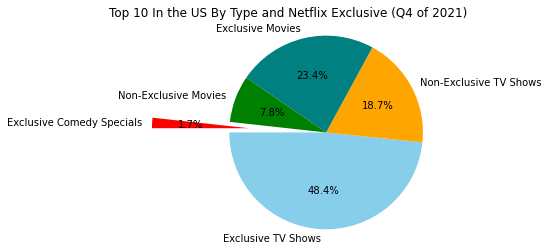

In [163]:
# creating variables to hold the numerical values that will be incorporated into the pie chart
q421_exclusive_tv = q4_2021.loc[(q4_2021["Netflix Exclusive"] == "Yes") & (q4_2021["Type"] == "TV Show")]["Netflix Exclusive"].count()
q421_non_exclusive_tv = q4_2021.loc[(q4_2021["Netflix Exclusive"] == "No") & (q4_2021["Type"] == "TV Show")]["Netflix Exclusive"].count()
q421_exclusive_movie = q4_2021.loc[(q4_2021["Netflix Exclusive"] == "Yes") & (q4_2021["Type"] == "Movie")]["Netflix Exclusive"].count()
q421_non_exclusive_movie = q4_2021.loc[(q4_2021["Netflix Exclusive"] == "No") & (q4_2021["Type"] == "Movie")]["Netflix Exclusive"].count()
q421_exclusive_comedy = q4_2021.loc[(q4_2021["Netflix Exclusive"] == "Yes") & (q4_2021["Type"] == "Stand-Up Comedy")]["Netflix Exclusive"].count()

# creating variables to hold the information that will be used to create the pie chart
q421_exclusive_list = [q421_exclusive_tv, q421_non_exclusive_tv, q421_exclusive_movie, q421_non_exclusive_movie, 
                       q421_exclusive_comedy]
q421_exclusive_names= ["Exclusive TV Shows", "Non-Exclusive TV Shows", "Exclusive Movies", 
                       "Non-Exclusive Movies", "Exclusive Comedy Specials"]
q421_colors = ["skyblue", "orange", "teal", "green", "red"]
explode = (0, 0, 0, 0, 0.8)

# creating the pie chart using the variables previously created. Also, printing the image to the folder to use in powerpoint
plt.pie(q421_exclusive_list, explode=explode, labels=q421_exclusive_names, colors=q421_colors, autopct="%1.1f%%", startangle=180)
plt.title("Top 10 In the US By Type and Netflix Exclusive (Q4 of 2021)")
plt.axis("equal")
plt.savefig("C:\\Users\\Derek\\Desktop\\The-First-Project\\q42021-pie.png", bbox_inches='tight')